From label 0-9, show 5 images for each label from CIFAR-10DataSet in data_batch_1:


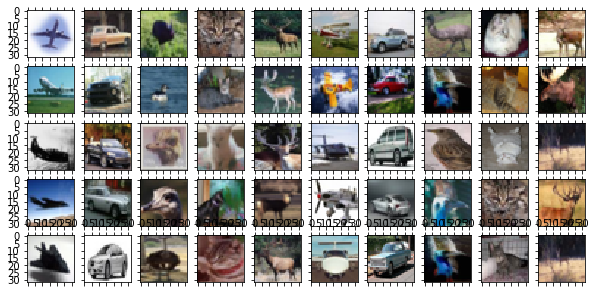

k is 6 ,norm Lp is L1
DBI of k-means algorithm is 8.640330
k is 6 ,norm Lp is L2
DBI of k-means algorithm is 8.323485
k is 7 ,norm Lp is L1
DBI of k-means algorithm is 9.319597
k is 7 ,norm Lp is L2
DBI of k-means algorithm is 8.573347
k is 8 ,norm Lp is L1
DBI of k-means algorithm is 9.050936
k is 8 ,norm Lp is L2
DBI of k-means algorithm is 8.592764
k is 9 ,norm Lp is L1
DBI of k-means algorithm is 9.379981
k is 9 ,norm Lp is L2
DBI of k-means algorithm is 8.588100
k is 10 ,norm Lp is L1
DBI of k-means algorithm is 9.390740
k is 10 ,norm Lp is L2
DBI of k-means algorithm is 9.290835
The minimum DBI : 8.323485
k of the minimum DBI : 6
Norm of the minimum DBI : L2 norm
The optimal clusters are shown below, and each column is a cluster:


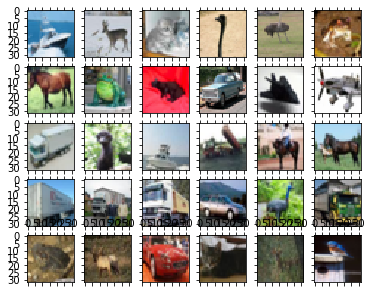

In [1]:
import matplotlib.pyplot as plt # 导入pyplot库按网格展示图片
import numpy as np # 导入numpy库用于数组运算
import random # 导入随机数库用于随机选择图片进行展示
# 一、读取二进制文件，获得数据集
def unpickle(file):
    # 导入pickle库将字节流转化为对象
    import pickle
    # 打开本地的二进制文件
    with open(file, 'rb') as fo:
        # 读取字节流，保存为dict格式
        dict = pickle.load(fo, encoding='bytes')
    # 返回dict
    return dict
# 二进制文件绝对路径
filename_train_set='D:\\Projects\\CIFAR-10DataSet\\cifar-10-batches-py\\data_batch_1'
# 获取训练集的dict
dict_train_set=unpickle(filename_train_set)
# 获得训练集的images信息，存入arr_images的列表，用于无监督学习
arr_images=dict_train_set[b'data']
# 获取训练集的label信息，存入arr_label的列表用于可视化展示
arr_label=dict_train_set[b'labels']

# 二、可视化展示10类图片数据
# 可视化样本
print('From label 0-9, show 5 images for each label from CIFAR-10DataSet in data_batch_1:')
# 使用matplotlib包进行画图，在matplotlib中，整个图像为一个Figure对象。
# 在Figure对象中可以包含一个或者多个Axes对象。每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域
# 下面这一步通过subplots函数建立一个5*10的图像，并且把参数返回给fig和ax
fig,ax=plt.subplots(nrows=5,ncols=10,sharex='all',sharey='all',figsize=(10, 5))
# flatten函数将ax由n*m的Axes组展平成1*nm的Axes组
ax = ax.flatten()
# 依次读50个图片，i表示标签
for i in range(10):
    # j表示某个类别下的image
    for j in range(5):
        # random_index是测试集的索引，初始化为一个1-1000内的随机数
        random_index=random.randint(1,1000)
        # while循环获得随机的5张测试集images，对应的测试集label是0-9
        while arr_label[random_index]!=j:
            # 取测试集样本的索引递增，避免图片重复
            random_index+=1
        # 用reshape函数对测试集图片进行变换，从而可以输出32*32的矩阵图像
        img=np.reshape(arr_images[random_index], (3, 32, 32)) 
        # 这里用np.transpose（img，(1,2,0)）将图片的格式由（channels,imagesize,imagesize）
        # 转化为（imagesize,imagesize,channels）,这样plt.show()就可以显示图片了
        img = img.transpose(1, 2, 0)
        # matshow是一个把矩阵或者数组绘制成图像的函数，这一步把img变成图像存入ax数组
        # i*5+j表示每一列是5张同类的图像
        ax[i*5+j].matshow(img)
# 显示plt图像，按网格展示50张图片
plt.show()

# 三、使用K-means算法实现图像聚类，使用L1和L2范数分别进行比较。
def k_means_algorithm(arr_images,k,p):
    # 初始均值向量vec是一个list(img)
    vec=[]
    # 聚类簇cluster是一个list(list(img))
    cluster=[]
    # 从样本集arr_images中随机选取k个样本作为初始均值向量{vec1，vec2，...，veck}，
    for i in range(k):
        # random_index_init是测试集的索引，初始化为一个1-100内的随机数加上i*100
        random_index_init=random.randint(1,100)+i*100
        # 把当前索引下的数据样本作为初始均值向量加入到vec中
        vec.append(arr_images[random_index_init])
    # 如果均值向量更新，则update_flag=True，否则，终止循环while
    update_flag=True
    # k均值算法的过程如下，循环执行该过程，直到当前均值向量均未更新，即update_flag=False
    while(update_flag):
        #清空现有聚类簇
        cluster.clear()
        # 定义k个空集作为聚类簇
        for i in range(k):
            cluster.append([])
        # 根据样本和簇均值向量的距离划分聚类簇
        for j in range(1000):
            # 初始化距离min_d_ji为一个较大值
            min_d_ji=1000000
            # 定义一个λj表示簇标记
            lambda_j=0
            # 计算样本arr_images[j]与各均值向量vec[i]之间的距离
            for i in range(k):
                # 使用Lp范数，d_ji=|| arr_images[j]-vec[i] ||p
                d_ji=np.linalg.norm(arr_images[j]-vec[i],ord=p, axis=None, keepdims=True)
                # 根据距离最近的均值向量确定arr_images[j]的簇标记lambda_j
                if d_ji<min_d_ji:
                    # 取最小距离
                    min_d_ji=d_ji
                    # lambda_j=argmin（i==1，2，..，k）d_ji
                    lambda_j=i
            # 默认使用Lp范数的结果，将样本arr_images[j]划入相应的簇cluster[lambda_j]
            cluster[lambda_j].append(arr_images[j])
        # 新的均值向量vec_new是一个list(img)
        vec_new=[]
        # 比较和更新均值向量
        for i in range(k):
            # 初始化一个新数组记录簇C中样本x的累加和
            sumv=np.zeros(len(arr_images[0]))
            # 对于簇cluster[i],依次累加其样本cluster[i][j]
            for j in range(len(cluster[i])):
                # 累加
                sumv+=cluster[i][j]
            # 计算新均值向量μi'，即这里的vec_new[i]
            vec_new.append(sumv/len(cluster[i]))
            # 获取新均值向量和原均值向量的差值
            a=vec_new[i] - vec[i] 
            # 比较均值向量的前后差异，如果超过最小调整幅度阈值0.0001，则更新均值向量
            if a.any()> 0.0001 or a.any()<-0.0001:
                # 更新均值向量
                vec[i]=vec_new[i]
                # 循环继续
                update_flag=True
            else:# 否则,差异不超过阈值，则均值向量保持不变
                # 结束循环
                update_flag=False
    # 当均值不再更新时，输出簇划分结果，以及均值向量。
    return cluster,vec
            
# 四、选用DBI评估聚类结果。
# 簇C内样本间的平均距离,距离计算采用欧氏距离dist(xi,xj)=||xi-xj||2,返回值为距离float类型
def getAvg_C(C):
    # 变量sum_dist计算距离的累加和
    sum_dist=0
    # 遍历簇C的每一个样本xi
    for i in range(len(C)):
        # 遍历簇C的另一个样本
        for j in range(len(C)):
            # 取i<j获得不重复的两个样本xi和xj
            if j>i:
                # 计算xi和xj的欧氏距离dist_ed(xi,xj)=||xi-xj||2，并获得累加和
                sum_dist+=np.linalg.norm(C[i]-C[j],ord=2, axis=None, keepdims=True)
    # 计算簇C内样本间的平均距离
    arg_C=2*sum_dist/(len(C)*(len(C)-1))
    # 返回
    return arg_C

# DB指数计算过程如下，返回值为float类型
def getDBI(cluster,vec,k):
    # 变量sum_avg计算簇C内样本间平均距离与簇中心点间距离之比的累加和
    sum_avg=0
    # 遍历所有的簇，记为Ci
    for i in range(k):
        # 初始化list计算DB指数公式中max的部分
        list_avg=[]
        # 遍历另外的簇，记为Cj
        for j in range(k):
            if j!=i:
                # 簇Ci内样本间的平均距离
                avg_Ci=getAvg_C(cluster[i])
                # 簇Cj内样本间的平均距离
                avg_Cj=getAvg_C(cluster[j])
                # 簇Ci与簇Cj中心点间的距离。距离计算采用欧氏距离dist(xi,xj)=||xi-xj||2
                d_Ci_Cj=np.linalg.norm(vec[i]-vec[j],ord=2, axis=None, keepdims=True)
                # list存储计算结果，从而获取符合条件的最大值。
                list_avg.append((avg_Ci+avg_Cj)/d_Ci_Cj)
        # 获得距离之比的最大值
        sum_avg+=max(list_avg)
    # 计算DBI指数
    DBI=sum_avg/k
    # 返回DBI计算结果
    return DBI
# 存储最小DBI时的簇分类结果
min_dbi_clusters=[]
# 存储最小DBI时的k值
min_dbi_k=[]
# 存储最小DBI时的范数p
min_dbi_p=[]
# DBI的最小值为min_dbi
min_dbi=1000000
# 当k取6-10时，分别进行k-means算法
for k in range(6,11):
    # 范数p取1或2，比较簇分类结果
    for p in range(1,3):     
        # 输出k和p值
        print('k is %d ,norm Lp is L%d'%(k,p))
        # 返回值获取k—means算法的簇分类结果cluster，和均值向量vec
        cluster,vec = k_means_algorithm(arr_images,k,p)
        # 返回值获取当前簇分类结果的DBI评价
        dbi=getDBI(cluster,vec,k)
        # 输出DBI评价
        print('DBI of k-means algorithm is %f' % dbi)
        # 通过比较获得最小的DBI
        if dbi<min_dbi:
            min_dbi=dbi
            # 记录k值
            min_dbi_k.append(k)
            # 记录p值
            min_dbi_p.append(p)
            # 记录簇分类结果
            min_dbi_clusters.append(cluster)
# 获取栈顶的k值
k=min_dbi_k[-1]
# 获取栈顶的p值
p=min_dbi_p[-1]
# 获取栈顶的簇分类结果
output_cluster=min_dbi_clusters[-1]
# 输出最小的DBI以及相关的簇分类结果参数。
print('The minimum DBI : %f' % min_dbi)
print('k of the minimum DBI : %d' % k)
print('Norm of the minimum DBI : L%d norm' % p)
# 五、根据选出的最优聚类数，可视化展示图片            
# 输出簇划分结果cluster={cluster[0],...cluster[k]}   
# 可视化样本,这部分基本符合作业中要求的输出格式，只需要加上具体的cluster标记，以及去掉坐标轴。
print('The optimal clusters are shown below, and each column is a cluster:')
# 下面这一步通过subplots函数建立一个5*k的图像，并且把参数返回给fig和ax
fig,ax=plt.subplots(nrows=5,ncols=k,sharex='all',sharey='all',figsize=(k, 5))
# flatten函数将ax由n*m的Axes组展平成1*nm的Axes组
ax = ax.flatten()
# 依次读50个图片，i表示标签
for i in range(k):
    # j表示某个类别下的image
    for j in range(5):
        # 用reshape函数对簇中的图片进行变换，从而可以输出32*32的矩阵图像
        img=np.reshape(output_cluster[i][j], (3, 32, 32)) 
        # 这里用np.transpose（img，(1,2,0)）将图片的格式由（channels,imagesize,imagesize）
        # 转化为（imagesize,imagesize,channels）,这样plt.show()就可以显示图片了
        img = img.transpose(1, 2, 0)
        # matshow是一个把矩阵或者数组绘制成图像的函数，这一步把img变成图像存入ax数组
        # i*5+j表示每一列是5张同类的图像
        ax[i*5+j].matshow(img)
# 显示plt图像，按网格展示50张图片
plt.show()
